## 3.3 재표본추출

### 3.3.1 순열검정

### 3.3.2 예제 : 웹 점착성

웹 디자인의 판매 효과 검증 <br>
: 페이지 A와 페이지 B의 평균 세션 시간 비교

Text(0.5, 0.98, '')

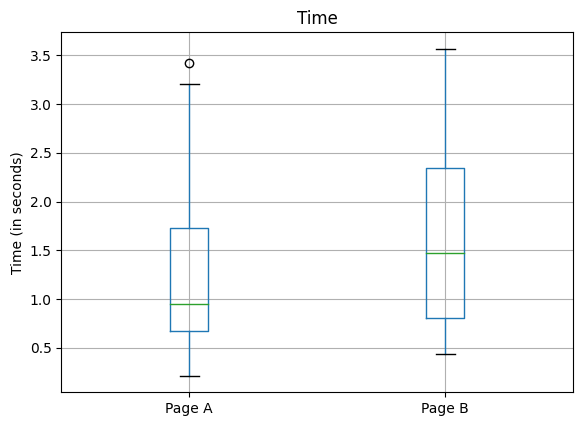

In [9]:
#각 페이지의 평균 세션 시간 박스플롯
import pandas as pd
import matplotlib.pyplot as plt

session_times = pd.read_csv("C:/big leader/github/Statistics_Study/juha/practical-statistics-for-data-scientists/data/web_page_data.csv")

ax = session_times.boxplot(by='Page', column='Time') #page열의 각 고유값에 따른 'time'열의 데이터 분포를 박스플롯으로 그림
ax.set_xlabel('') #x축 레이블('page') 삭제
ax.set_ylabel('Time (in seconds)') #y축 레이블 설정
plt.suptitle('') #서브타이틀 삭제

In [15]:
#페이지별 time열의 평균의 차이 
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

0.3566666666666669

In [36]:
#순열검정 : 데이터셋에서 두 그룹의 평균값 차이를 랜덤하게 샘플링하여 계산
import random

def perm_fun(x, nA, nB) :
    n = nA + nB
    idx_B = random.sample(range(n), nB)
    idx_A = list(set(range(n)) - set(idx_B))
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

In [28]:
nA = (session_times.Page == 'Page A').sum()
nB = (session_times.Page == 'Page B').sum()
nA, nB

(21, 15)

Text(0, 0.5, 'Frequency')

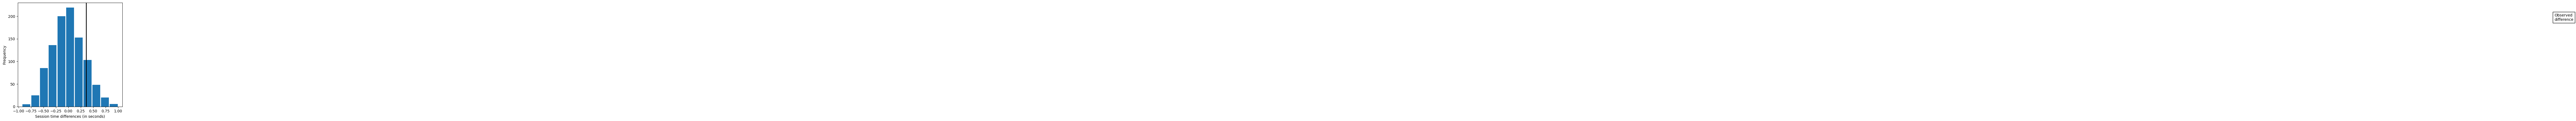

In [50]:
#두 그룹 간 시간 차이를 계산하여 리스트에 저장
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5)) #그래프와 축 크기 설정
ax.hist(perm_diffs, bins=11, rwidth=0.9) #11개의 구간, 각 막대의 너비는 전체 너비의 90%인 히스토그램
ax.axvline(x = mean_b - mean_a, color='black', lw=2) #그룹 간 평균 차이에 대한 수직선
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor' :'white'}) 
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [46]:
np.mean(np.array(perm_diffs) > mean_b - mean_a)

0.149

## 3.4 통계적 유의성과 p값

전환 전 가격 A : 200 <br>
전환 후 가격 A : 23739 <br>
전환 전 가격 B : 182 <br>
전환 후 가격 B : 22406 <br>

Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

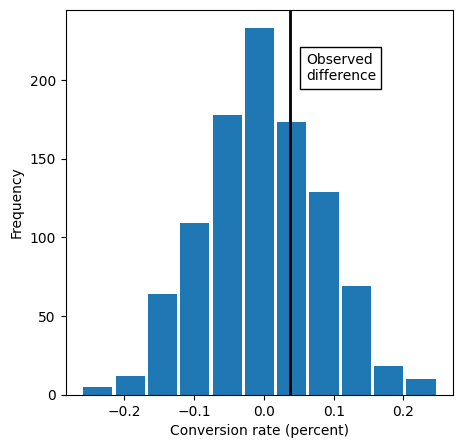

In [49]:
obs_pct_diff = 100*(200/23739 - 182/22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0]*45945
conversion.extend([1]*382)
conversion = pd.Series(conversion)

perm_diffs = [100*perm_fun(conversion, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

### 3.4.1 p값